# Spam Detection Using Random Forrest

### Part a)

In [1]:
import pandas as pd
import numpy as np
import os

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv("./spam.csv", index_col=0)

data.shape

(4601, 58)

### Part a)

In [3]:
label = data["type"].unique()
label

array(['spam', 'nonspam'], dtype=object)

### Part b)

In [4]:
X = data.drop("type", axis=1)
y = data["type"]

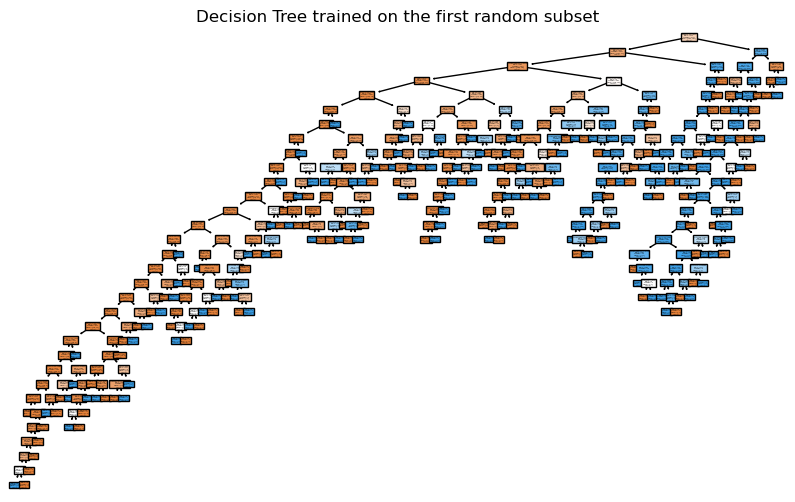

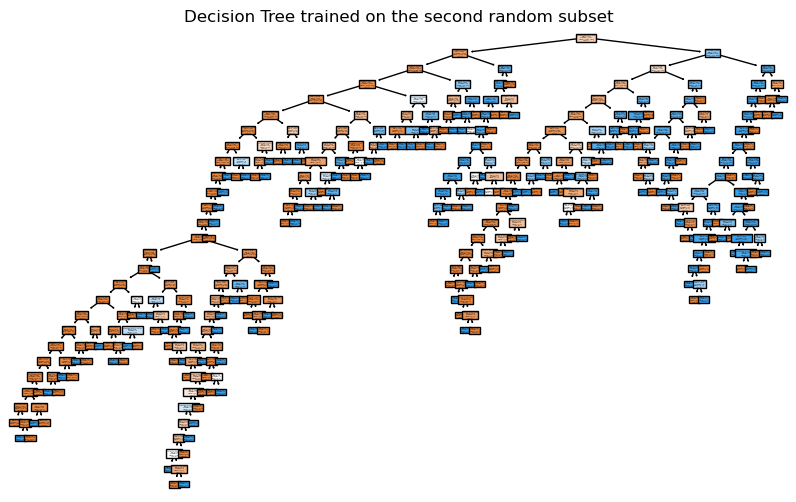

In [5]:
# Split the data into two random subsets, each comprising 60% of observations
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X, y, train_size=0.6, random_state=42)
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, train_size=0.6, random_state=52)

# Initialize the Decision Tree classifier
dtree1 = DecisionTreeClassifier(random_state=42)
dtree2 = DecisionTreeClassifier(random_state=52)

# Fit the model on the first subset
dtree1.fit(X_train1, y_train1)

# Fit the model on the second subset
dtree2.fit(X_train2, y_train2)

# Plot the first decision tree
plt.figure(figsize=(10,6))
plot_tree(dtree1, filled=True, feature_names=X.columns, class_names="type")
plt.title("Decision Tree trained on the first random subset")
plt.show()

# Plot the second decision tree
plt.figure(figsize=(10,6))
plot_tree(dtree2, filled=True, feature_names=X.columns, class_names="type")
plt.title("Decision Tree trained on the second random subset")
plt.show()

### Part c)

In [6]:
# Initializing the Random Forest classifier with OOB error estimation enabled
rf = RandomForestClassifier(oob_score=True, random_state=42)

# Fitting the model
rf.fit(X, y)

# Calculating the OOB error
oob_error = 1 - rf.oob_score_
print(f"OOB Error: {oob_error*100:.2f}%")

OOB Error: 4.65%


### Part d)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

result = permutation_importance(
    rf, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1
)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

In [8]:
forest_importances

address             -9.470026e-04
addresses            5.212858e-05
all                 -5.039096e-04
business            -7.819288e-05
capitalAve           5.942659e-03
capitalLong          2.519548e-03
capitalTotal        -2.189401e-03
charDollar           5.638575e-03
charExclamation      1.341442e-02
charHash            -1.563858e-04
charRoundbracket     1.841877e-03
charSemicolon       -1.390096e-04
charSquarebracket   -1.110223e-18
conference           2.606429e-05
credit              -1.216334e-04
cs                   2.606429e-05
data                -2.085143e-04
direct              -9.643788e-04
edu                  6.272806e-03
email               -9.296264e-04
font                 1.589922e-03
free                 3.440487e-03
george               7.584709e-03
hp                   1.551694e-02
hpl                  1.789748e-03
internet             2.389227e-03
lab                 -1.390096e-04
labs                -1.390096e-04
mail                -1.112076e-03
make          

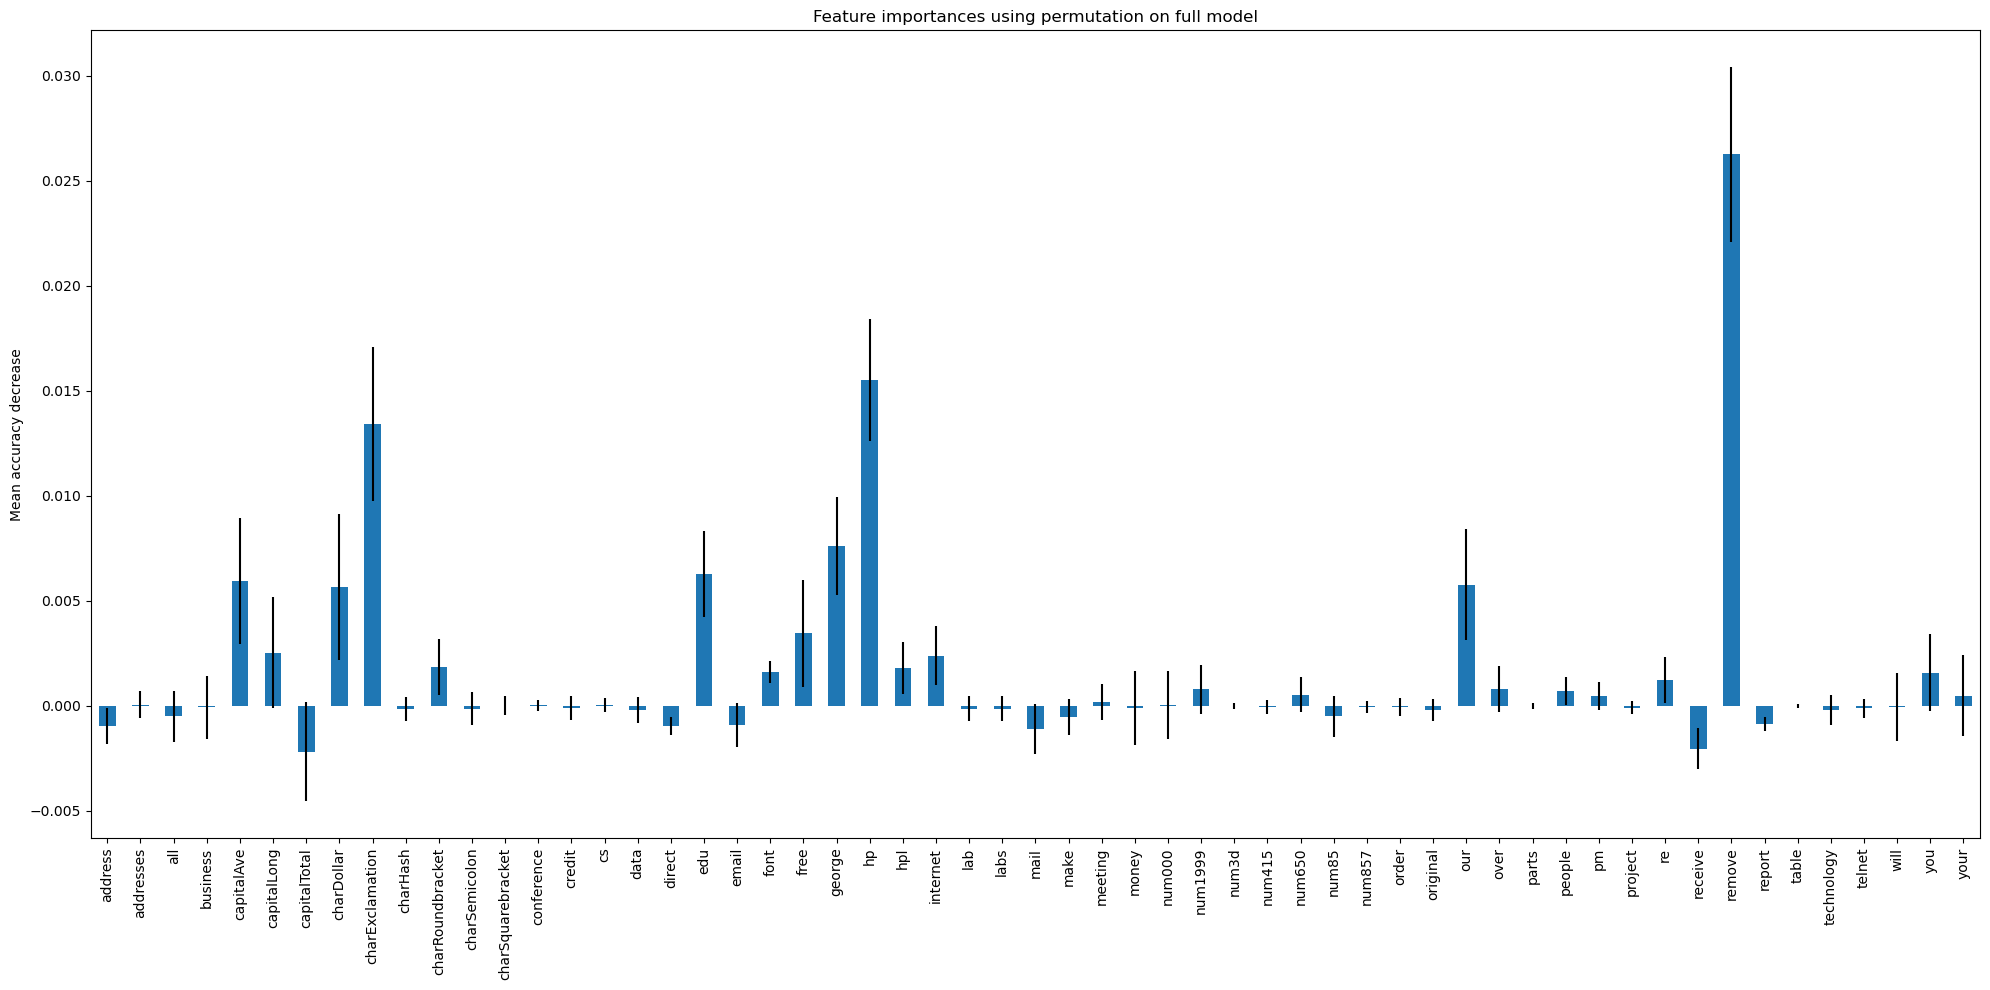

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()